In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv('readings.csv')

In [3]:
dataframe.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Feature engineering
timestamp --> year, month, date

In [4]:
dataframe['date'] = dataframe['date'].astype(str)

dataframe['year'] = dataframe['date'].str[:4].astype(int)
dataframe['month'] = dataframe['date'].str[4:6].astype(int)
dataframe['day'] = dataframe['date'].str[6:8].astype(int)

dataframe.drop(labels='date', axis=1, inplace=True)

In [5]:
dataframe

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year,month,day
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979,1,1
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979,1,2
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979,1,3
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979,1,4
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
15336,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN,2020,12,27
15337,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN,2020,12,28
15338,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN,2020,12,29
15339,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN,2020,12,30


## Data cleaning

Which columns contain NaN values?

In [6]:
def get_monthly_mean(df):
    # Compute group-wise means while preserving the original DataFrame shape
    grouped_mean = df.groupby(['year', 'month']).transform('mean')

    # Fill NaN values in the original DataFrame with these means
    df = df.fillna(grouped_mean)
    return df

In [7]:
dataframe = get_monthly_mean(dataframe)
dataframe = dataframe.fillna(value=0)

## Feature selection

<AxesSubplot:>

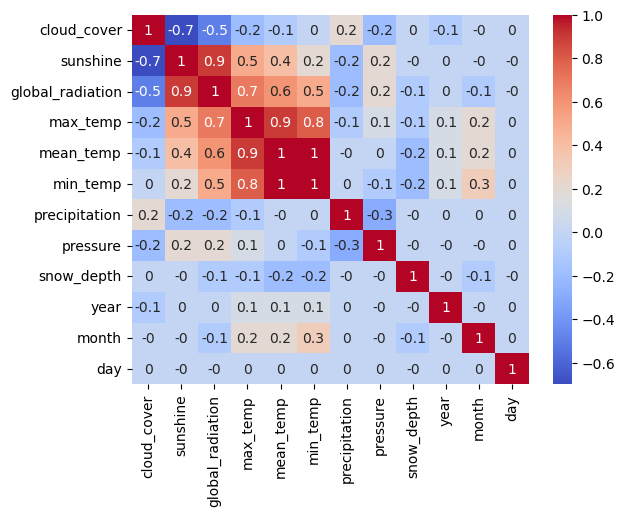

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = dataframe.corr().round(1)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

## PCA

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
dataframe['sun_rad_combined'] = pca.fit_transform(dataframe[['sunshine', 'global_radiation']])

## Linear regression

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
X = dataframe[['cloud_cover', 'sunshine', 'global_radiation', 'precipitation', 
             'pressure', 'snow_depth', 'year', 'month', 'day']]
y = dataframe['mean_temp']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 2.8807870346670974
Mean Squared Error (MSE): 13.398385802410457
R-squared (R2): 0.5887546642502989


## Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=40, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=40, random_state=42)

In [27]:
y_pred = rf_model.predict(X_test)

In [28]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 2.3393981495451954
Mean Squared Error (MSE): 8.841205527202366
R-squared (R2): 0.7286311508650298
